In [3]:
# Loading the necessary packages

# Packages that are required for basic computation
import numpy as np
import pandas as pd

# Packages for graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) #adds a nice background to the graphs
sns.set() #setting the default seaborn style for our plots

# Packages for statistics
import scipy.stats as stats

# Packages to ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
mydata = pd.read_csv('Survey-1.csv')

In [5]:
mydata.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [6]:
mydata.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [7]:
mydata.shape

(62, 14)

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [9]:
mydata.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [10]:
mydata.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


In [11]:
mydata.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [12]:
mydata['Class'].unique()

array(['Junior', 'Senior', 'Sophomore'], dtype=object)

In [13]:
mydata['Major'].unique()

array(['Other', 'Management', 'CIS', 'Economics/Finance', 'Undecided',
       'International Business', 'Retailing/Marketing', 'Accounting'],
      dtype=object)

In [14]:
mydata['Grad Intention'].unique()

array(['Yes', 'Undecided', 'No'], dtype=object)

In [15]:
mydata['Employment'].unique()

array(['Full-Time', 'Part-Time', 'Unemployed'], dtype=object)

In [16]:
mydata['Computer'].unique()

array(['Laptop', 'Tablet', 'Desktop'], dtype=object)

### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major



In [17]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.1.2. Gender and Grad Intention

In [18]:
pd.crosstab(mydata['Gender'],mydata['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 2.1.3. Gender and Employment 

In [19]:
pd.crosstab(mydata['Gender'],mydata['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 2.1.4. Gender and Computer

In [20]:
pd.crosstab(mydata['Gender'],mydata['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [21]:
Total_number_of_students = mydata['Gender'].count()
Total_number_of_students

62

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [22]:
Number_of_male = mydata[mydata['Gender'] == 'Male']['Gender'].count()
Number_of_male

29

In [23]:
print('The probability that a randomly selected CMSU student will be male is', Number_of_male/Total_number_of_students)

The probability that a randomly selected CMSU student will be male is 0.46774193548387094


#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [24]:
Number_of_female = mydata[mydata['Gender'] == 'Female']['Gender'].count()
Number_of_female

33

In [25]:
print('The probability that a randomly selected CMSU student will be female is', Number_of_female/Total_number_of_students)

The probability that a randomly selected CMSU student will be female is 0.532258064516129


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [26]:
mydata['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [27]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [28]:
Total_Male = 29

In [29]:
# Pr(Accounting|Male)

Accounting_Male = 4

print('The probability of student taking Accounting as major among the male students in CMSU', Accounting_Male/Total_Male)

The probability of student taking Accounting as major among the male students in CMSU 0.13793103448275862


In [30]:
# Pr(CIS|Male)

CIS_Male = 1

print('The probability of student taking  CIS as major among the male students in CMSU', CIS_Male/Total_Male)

The probability of student taking  CIS as major among the male students in CMSU 0.034482758620689655


In [31]:
# Pr(Economics/Finance|Male)

Economics_Finance_Male = 4

print('The probability of student taking  Economics/Finance as major among the male students in CMSU', Economics_Finance_Male/Total_Male)

The probability of student taking  Economics/Finance as major among the male students in CMSU 0.13793103448275862


In [32]:
# Pr(International Business|Male)

International_Business_Male = 2

print('The probability of student taking International Business as major among the male students in CMSU', International_Business_Male/Total_Male)

The probability of student taking International Business as major among the male students in CMSU 0.06896551724137931


In [33]:
# Pr(Management|Male)

Management_Male = 6

print('The probability of student taking  Management as major among the male students in CMSU', Management_Male/Total_Male)

The probability of student taking  Management as major among the male students in CMSU 0.20689655172413793


In [34]:
# Pr(Other|Male)

Other_Male = 4

print('The probability of student taking  Other majors among the male students in CMSU', Other_Male/Total_Male)

The probability of student taking  Other majors among the male students in CMSU 0.13793103448275862


In [35]:
# Pr(Retailing/Marketing|Male)

Retailing_Marketing_Male = 5

print('The probability of student taking  Retailing/Marketing as major among the male students in CMSU', Retailing_Marketing_Male/Total_Male)

The probability of student taking  Retailing/Marketing as major among the male students in CMSU 0.1724137931034483


In [36]:
# Pr(Undecided|Male)

Undecided_Male = 3

print('The probability of student who have not decided their major among the male students in CMSU', Undecided_Male/Total_Male)

The probability of student who have not decided their major among the male students in CMSU 0.10344827586206896


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [37]:
Total_Female = 33

In [38]:
# Pr(Accounting|Female)

Accounting_Female = 3

print('The probability of student taking  Accounting as major among the female students in CMSU', Accounting_Female/Total_Female)

The probability of student taking  Accounting as major among the female students in CMSU 0.09090909090909091


In [39]:
# Pr(CIS|Female)

CIS_Female = 3

print('The probability of student taking  CIS as major among the female students in CMSU', CIS_Female/Total_Female)

The probability of student taking  CIS as major among the female students in CMSU 0.09090909090909091


In [40]:
# Pr(Economics/Finance|Female)

Economics_Finance_Female = 7

print('The probability of student taking Economics/Financ as major among the female students in CMSU', Economics_Finance_Female/Total_Female)

The probability of student taking Economics/Financ as major among the female students in CMSU 0.21212121212121213


In [41]:
# Pr(International Business|Female)

International_Business_Female = 4

print('The probability of student taking  International Business as major among the female students in CMSU', International_Business_Female/Total_Female)

The probability of student taking  International Business as major among the female students in CMSU 0.12121212121212122


In [42]:
# Pr(Management|Female)

Management_Female = 4

print('The probability of student taking  Management as major among the female students in CMSU', Management_Female/Total_Female)

The probability of student taking  Management as major among the female students in CMSU 0.12121212121212122


In [43]:
# Pr(Other|Female)

Other_Female = 3

print('The probability of student taking  Other majors among the female students in CMSU', Other_Female/Total_Female)

The probability of student taking  Other majors among the female students in CMSU 0.09090909090909091


In [44]:
# Pr(Retailing/Marketing|Female)

Retailing_Marketing_Female = 9

print('The probability of student taking  Retailing/Marketing as major among the female students in CMSU', Retailing_Marketing_Female/Total_Female)

The probability of student taking  Retailing/Marketing as major among the female students in CMSU 0.2727272727272727


In [45]:
# Pr(Undecided|Female)

Undecided_Female = 0

print('The probability of student who have not decided their major among the female students in CMSU', Undecided_Female/Total_Female)

The probability of student who have not decided their major among the female students in CMSU 0.0


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

#### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [46]:
Total_Male = 29
Total = 62

In [47]:
pd.crosstab(mydata['Gender'],mydata['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [48]:
# P (M): Probability that a randomly selected CMSU student will be male
# P (G): Probability that a randomly selected CMSU student intends to graduate

# P(G ∩ M) = P (G | M) x P (M)

(17 / 29) * (29 / 62)

0.27419354838709675

#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [49]:
pd.crosstab(mydata['Gender'],mydata['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [50]:
#P (F): Probability that a randomly selected CMSU student will be female
#P (Lc): Probability that a randomly selected CMSU student has no laptop

# P(F ∩ Lc) = P (F | Lc) x P (F)

(4 / 33) * (33 / 62)

0.06451612903225806

### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?


In [51]:
mydata['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [52]:
pd.crosstab(mydata['Gender'],mydata['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [62]:
# P (M): Probability that a randomly selected CMSU student will be male
# P (FT): Probability that a randomly selected CMSU student has full-time employment

#P(M U FT) = P (M) + P (FT) - P(M ∩ FT)

(29 / 62) + (10 / 62) - (7 / 62)

0.5161290322580645

#### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [68]:
pd.crosstab(mydata['Gender'],mydata['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [69]:
# P(IB_M | F): Conditional probability that given a female student is randomly chosen, she is majoring in 
# international business or management

(4+4) /33

0.24242424242424243

### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [72]:
new = mydata[mydata['Grad Intention'] != 'Undecided']

In [73]:
new

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


In [74]:
new['Gender'].value_counts()

Female    20
Male      20
Name: Gender, dtype: int64

In [75]:
pd.crosstab(new['Gender'],new['Grad Intention'] )

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [77]:
# P(F ∩ Yes) = P(F)P(Yes) -------> To prove

In [78]:
#P(F)
    
20/40    

0.5

In [79]:
#P(Yes)

28/40

0.7

In [80]:
#P(F)P(Yes)

(0.5)*(0.7)

0.35

In [81]:
# P(F ∩ Yes) 

11/40

0.275

### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### Answer the following questions based on the data


#### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [82]:
new_gpa = mydata[mydata['GPA'] < 3]

In [83]:
new_gpa['GPA'].unique()

array([2.9, 2.5, 2.8, 2.3, 2.6, 2.4])

In [84]:
new_gpa['GPA'].count()

17

In [85]:
17/62

0.27419354838709675

#### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [91]:
new_salary = mydata[mydata['Salary'] >= 50]

In [99]:
pd.crosstab(new_salary['Gender'],new_salary['Salary'] )

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1
Male,4,1,1,3,3,1,0,0,1


##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#P(Salary >= 50 | M) 

14 / 29 

0.4827586206896552

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
#P(Salary >= 50 | F) 
18 / 33

0.5454545454545454

### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

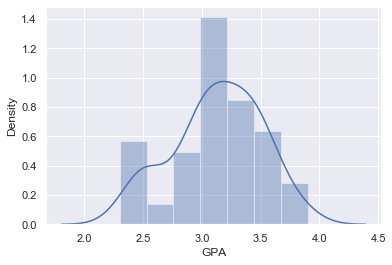

In [100]:
sns.distplot(mydata['GPA']);

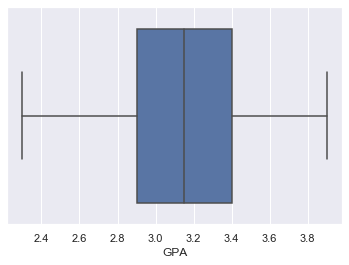

In [101]:
sns.boxplot(mydata['GPA']);

In [103]:
#for mean and median

mydata['GPA'].describe()

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64

In [104]:
# for mode

In [105]:
mydata['GPA'].unique()

array([2.9, 3.6, 2.5, 2.8, 2.3, 3. , 3.1, 3.3, 3.5, 3.4, 3.2, 3.7, 2.6,
       3.9, 3.8, 2.4])

In [106]:
mydata['GPA'].value_counts()

3.1    7
3.4    7
3.0    7
3.2    6
3.5    6
2.5    6
3.3    5
2.9    4
3.6    3
2.8    3
3.7    2
2.6    2
2.4    1
3.9    1
3.8    1
2.3    1
Name: GPA, dtype: int64

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

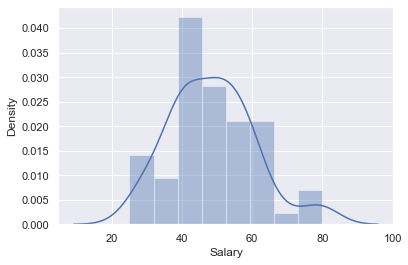

In [111]:
sns.distplot(mydata['Salary']); 

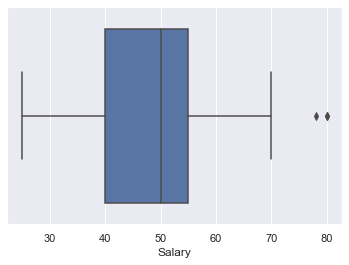

In [112]:
sns.boxplot(mydata['Salary']);

In [107]:
#for mean and median

mydata['Salary'].describe()

count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64

In [108]:
# for mode

In [109]:
mydata['Salary'].unique()

array([50. , 25. , 45. , 40. , 78. , 80. , 30. , 37.5, 37. , 54. , 55. ,
       52. , 60. , 65. , 47. , 35. , 47.5, 42. , 70. ])

In [110]:
mydata['Salary'].value_counts()

40.0    12
50.0     9
60.0     8
55.0     8
45.0     5
30.0     5
35.0     2
80.0     2
37.5     1
25.0     1
78.0     1
70.0     1
37.0     1
42.0     1
52.0     1
65.0     1
47.0     1
47.5     1
54.0     1
Name: Salary, dtype: int64

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

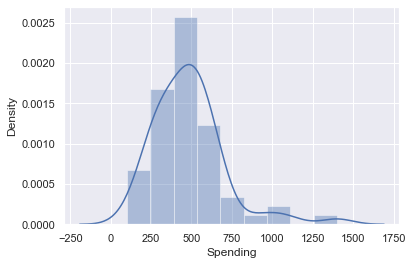

In [117]:
sns.distplot(mydata['Spending']); 

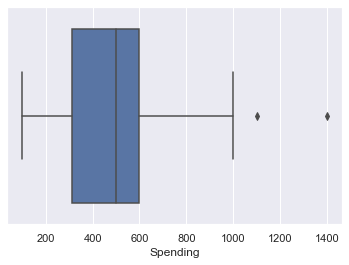

In [118]:
sns.boxplot(mydata['Spending']);

In [113]:
#for mean and median

mydata['Spending'].describe()

count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64

In [114]:
# for mode

In [115]:
mydata['Spending'].unique()

array([ 350,  360,  600,  500,  700,  200,  400,  450,  300,  690,  375,
        900, 1100, 1400,  680,  100,  650,  220,  520,  250, 1000,  490],
      dtype=int64)

In [116]:
mydata['Spending'].value_counts()

500     14
600      9
300      8
400      5
200      4
350      3
450      2
250      2
650      2
220      1
900      1
520      1
1100     1
680      1
700      1
1000     1
360      1
490      1
690      1
375      1
1400     1
100      1
Name: Spending, dtype: int64

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

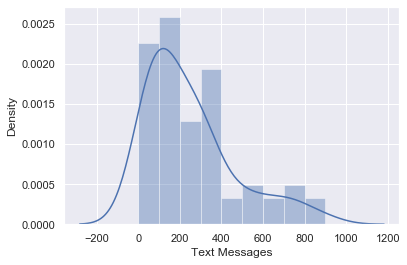

In [123]:
sns.distplot(mydata['Text Messages']); 

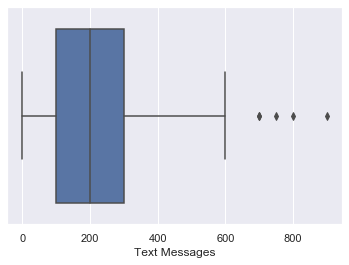

In [124]:
sns.boxplot(mydata['Text Messages']);

In [119]:
#for mean and median

mydata['Text Messages'].describe()

count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64

In [120]:
# for mode

In [121]:
mydata['Text Messages'].unique()

array([200,  50, 250, 100,  30, 300, 400,  45, 150, 175, 350, 500,  35,
       600,  40,  60, 140, 750,  70, 800, 900, 105, 700,  10,   0],
      dtype=int64)

In [122]:
mydata['Text Messages'].value_counts()

300    10
100     8
50      6
200     6
150     4
500     3
600     2
350     2
700     2
105     2
250     2
400     2
900     1
70      1
10      1
140     1
60      1
30      1
800     1
35      1
40      1
45      1
750     1
175     1
0       1
Name: Text Messages, dtype: int64

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [125]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(mydata.GPA),stats.skew(mydata.Salary),stats.skew(mydata.Spending),
                                    stats.skew(mydata['Text Messages'])]},
                        index=['GPA', 'Salary', 'Spending','Text Messages'])  
Skewness

,Skewness
GPA,-0.306937
Salary,0.521677
Spending,1.547285
Text Messages,1.264245
